In [1]:
import pandas as pd
import matplotlib.pyplot as plt
orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')
orders_copy = orders
orders

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
1       26341    IN-2014-JR162107-41675     2/5/14    2/7/14    Second Class   
2       25330    IN-2014-CR127307-41929   10/17/14  10/18/14     First Class   
3       13524   ES-2014-KM1637548-41667    1/28/14   1/30/14     First Class   
4       47221   SG-2014-RH9495111-41948    11/5/14   11/6/14        Same Day   
...       ...                       ...        ...       ...             ...   
51285   29002   IN-2015-KE1642066-42174    6/19/15   6/19/15        Same Day   
51286   34337  US-2014-ZD21925140-41765     5/6/14   5/10/14  Standard Class   
51287   31315  CA-2012-ZD21925140-41147    8/26/12   8/31/12    Second Class   
51288    9596   MX-2013-RB1979518-41322    2/17/13   2/21/13  Standard Class   
51289    6147   MX-2013-MC1810093-41416    5/22/13   5/26/13    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ...   Product.ID         Category Sub.Category  \
0      Oklahoma City  ...  TEC-PH-5816       Technology       Phones   
1         Wollongong  ...  FUR-CH-5379        Furniture       Chairs   
2           Brisbane  ...  TEC-PH-5356       Technology       Phones   
3             Berlin  ...  TEC-PH-5267       Technology       Phones   
4              Dakar  ...  TEC-CO-6011       Technology      Copiers   
...              ...  ...          ...              ...          ...   
51285           Kure  ...  OFF-FA-3072  Office Supplies    Fasteners   
51286    Chattanooga  ...  FUR-FU-4070        Furniture  Furnishings   
51287  San Francisco  ...  OFF-AR-5321  Office Supplies          Art   
51288       Valinhos  ...  OFF-BI-2919  Office Supplies      Binders   
51289       Tipitapa  ...  OFF-PA-3990  Office Supplies        Paper   

                                        Product.Name      Sales Quantity  \
0                                   Samsung Convoy 3    $221.98        2   
1          Novimex Executive Leather Armchair, Black  $3,709.40        9   
2                  Nokia Smart Phone, with Caller ID  $5,175.17        9   
3                     Motorola Smart Phone, Cordless  $2,892.51        5   
4                     Sharp Wireless Fax, High-Speed  $2,832.96        8   
...                                              ...        ...      ...   
51285                  Advantus Thumb Tacks, 12 Pack     $65.10        5   
51286  Eldon Image Series Desk Accessories, Burgundy     $16.72        5   
51287                                     Newell 341      $8.56        2   
51288                        Acco Index Tab, Economy     $13.44        2   
51289        Eaton Computer Printout Paper, 8.5 x 11     $61.38        3   

      Discount    Profit Shipping.Cost  Order.Priority  
0          0.0    $62.15        40.770            High  
1          0.1  -$288.77       923.630        Critical  
2          0.1   $919.97       915.490          Medium  
3          0.1   -$96.54       910.160          Medium  
4          0.0   $311.52       903.040        Critical  
...        ...       ...           ...             ...  
51285      0.0     $4.50         1.010  

In [98]:
orders.columns
orders_copy.dtypes

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date                 object
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [2]:
orders_copy['Profit'] = orders_copy['Profit'].str.replace('$', '').str.replace(',', '').astype('float')
orders_copy['Sales'] = orders_copy['Sales'].str.replace('$', '').str.replace(',', '').astype('float')

In [149]:
orders_copy['Order.Date'] = pd.to_datetime(orders_copy['Order.Date'])
seasonal = orders_copy[['Order.Date', 'Quantity', 'Category']]
seasonal = seasonal.set_index('Order.Date')
# seasonal = seasonal.groupby(['Order.Date', 'Category']).agg({'Quantity': 'sum'})
seasonal

Quantity         Category
Order.Date                           
2014-11-11         2       Technology
2014-02-05         9        Furniture
2014-10-17         9       Technology
2014-01-28         5       Technology
2014-11-05         8       Technology
...              ...              ...
2015-06-19         5  Office Supplies
2014-05-06         5        Furniture
2012-08-26         2  Office Supplies
2013-02-17         2  Office Supplies
2013-05-22         3  Office Supplies

[51290 rows x 2 columns]

In [34]:
returns_copy = returns.rename(columns={'Order ID': 'Order.ID'})
combined = orders_copy.merge(returns_copy, on='Order.ID', how='left')
returned_count = combined.groupby(['Customer.Name']).agg({'Returned': 'count'}).sort_values(by=['Returned'], ascending=False)
returned_count.loc[returned_count['Returned'] > 5]
returned_region = combined.groupby(['Region_y']).agg({'Returned': 'count'}).sort_values(by=['Returned'], ascending=False)
returned_categories = combined.groupby(['Category']).agg({'Returned': 'count'}).sort_values(by=['Returned'], ascending=False)
returned_categories


Returned
Category                 
Office Supplies      1348
Technology            445
Furniture             427

In [35]:
combined_copy = combined
combined_copy
combined_copy['Returned'].loc[combined_copy['Returned'] == 'Yes']
combined_copy['Returned'] = combined_copy['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)
combined_copy['Order.Date'] = pd.to_datetime(combined_copy['Order.Date'])
combined_copy['Ship.Date'] = pd.to_datetime(combined_copy    ['Ship.Date'])
combined_copy['Process.Time'] = combined_copy['Ship.Date'] - combined_copy['Order.Date']

In [130]:
returned_ids = combined_copy.groupby(['Product.ID']).agg({'Returned':'count'}).sort_values(by=['Returned'], ascending=False)
combined_copy.loc[combined_copy['Product.ID'].isin(returned_ids.index.values)]
returned_ids['Product.ID'] = returned_ids.index
returned_ids.rename({'Returned': 'Returned.Count'}, axis=1, inplace=True)
returned_ids = returned_ids.reset_index(drop=True)
final = combined_copy.merge(returned_ids, on='Product.ID')

Empty DataFrame
Columns: [Row.ID, Order.ID, Order.Date, Ship.Date, Ship.Mode, Customer.ID, Customer.Name, Segment, Postal.Code, City, State, Country, Region_x, Market, Product.ID, Category, Sub.Category, Product.Name, Sales, Quantity, Discount, Profit, Shipping.Cost, Order.Priority, Returned, Region_y, Process.Time, Returned.Count]
Index: []

[0 rows x 28 columns]

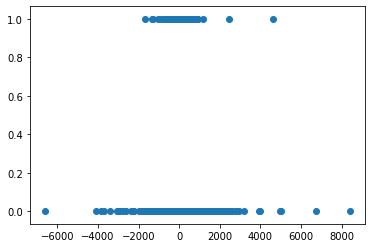

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = final[['Profit']]
y = final['Returned']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y, test_size = 0.2)

logistic = LogisticRegression()
logistic.fit(x_training_data, y_training_data)
logistic.score(x_training_data, y_training_data)
predictions = logistic.predict(x_test_data)
plt.scatter(x=X, y=y)
plt.show()